In [1]:
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from utils import branin_rcos, six_hump_camel_back, goldstein_price, \
rosenbrock, hartman_6, Styblinski_Tang, Michalewicz

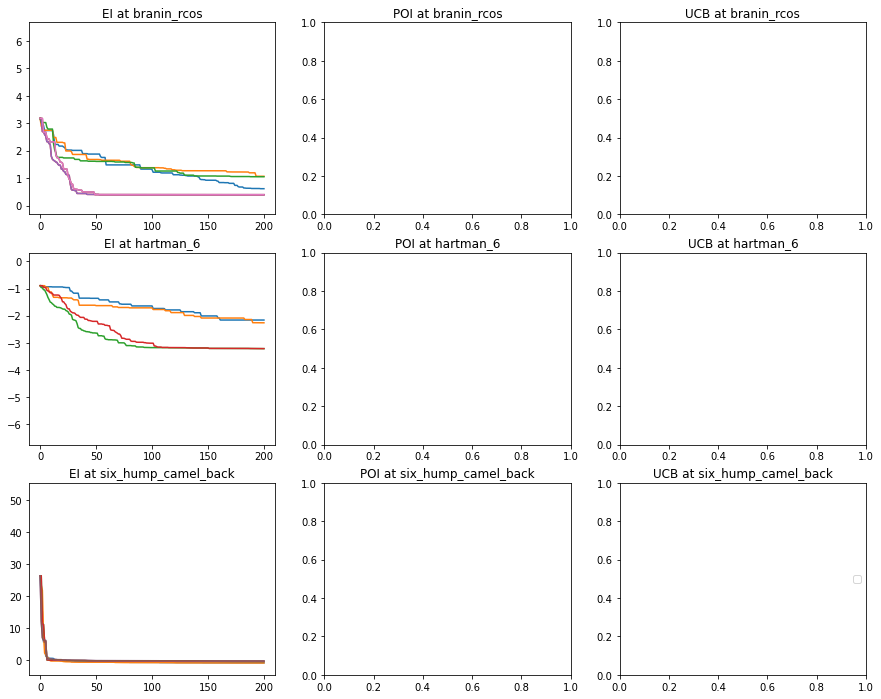

In [2]:
bench_funs = ["branin_rcos", "hartman_6", "six_hump_camel_back"]
acq_funs = ["EI", "POI", "UCB"]
dir_models = ["./result/" + x for x in os.listdir("./result/")]

fig, axs = plt.subplots(len(bench_funs), len(acq_funs), figsize = (15, 12))

for row_ind, bench_fun in enumerate(bench_funs):
    for col_ind, acq_fun in enumerate(acq_funs):
        axs[row_ind, col_ind].set_title(acq_fun + " at " + bench_fun)

len_iter = 10
        
legends = []
for dir_model in dir_models:
    if os.listdir(dir_model):
        legends.append(dir_model)
        for csv_file in os.listdir(dir_model):
            data = pd.read_csv(os.getcwd() + "/" + dir_model + "/" + csv_file)
            for row_ind, bench_fun in enumerate(bench_funs):
                if bench_fun in csv_file:
                    for col_ind, acq_fun in enumerate(acq_funs):
                        if acq_fun in csv_file:
                            mean = data.iloc[:,1:1+len_iter].mean(axis = 1)
                            std = data.iloc[:,1:1+len_iter].mean(axis = 1)
                            axs[row_ind, col_ind].plot(mean)
                            axs[row_ind, col_ind].fill_between(mean - std, mean + std)
                            break
                    break

plt.legend(legends, loc = "right")

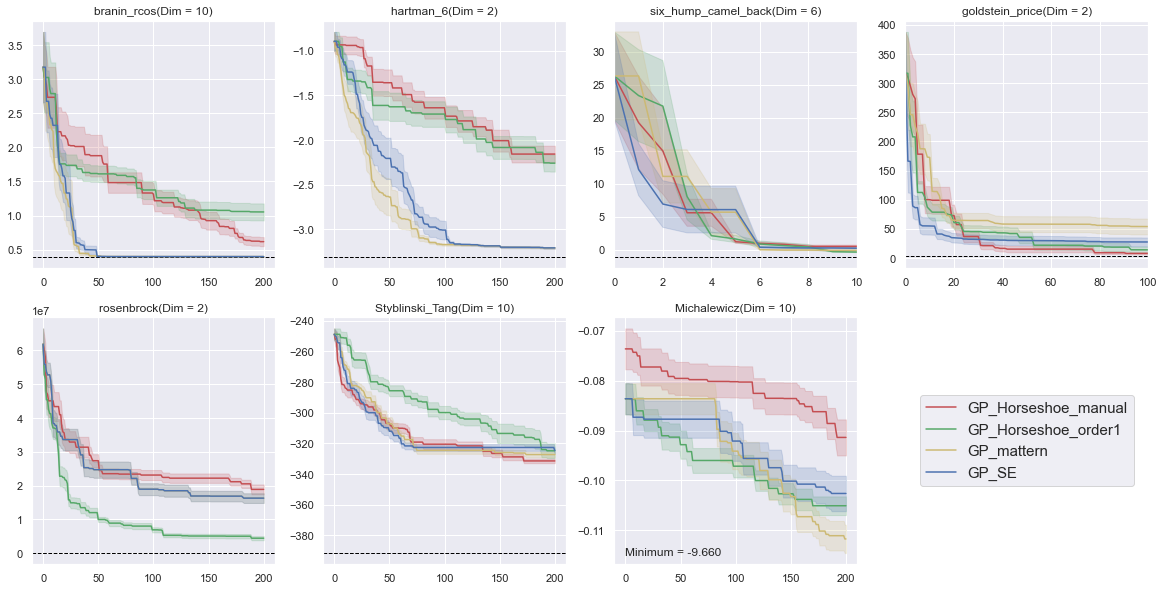

In [11]:
sns.set(style="darkgrid")

len_iter = 10

bench_funs = ["branin_rcos", "hartman_6", "six_hump_camel_back", "goldstein_price", "rosenbrock", "Styblinski_Tang", "Michalewicz"]
acq_funs = ["EI"]
dir_models = ["./result/" + x for x in os.listdir("./result/") if "GP" in x and str(len_iter) in x]

fig, axs = plt.subplots(len(bench_funs) // 4 + 1, 4, figsize = (20, 10))

for ind, bench_fun in enumerate(bench_funs):
    axs[ind // 4, ind % 4].set_title(bench_fun + "(Dim = %d)" %obj_fun.dim)
    if bench_fun == "Michalewicz":
        exec("obj_fun = " + bench_fun + "()")
        axs[ind // 4, ind % 4].text(0, -0.115, s = "Minimum = %.3f" %obj_fun.sol_val)
    else:
        exec("obj_fun = " + bench_fun + "()")
        axs[ind // 4, ind % 4].axhline(y=obj_fun.sol_val, color="black", linestyle='--', linewidth = 1)

colors = ["r", "g", "y", "b"]
color_ind = -1
legends = {}
for dir_model in dir_models:
    color_ind += 1
    legends[dir_model] = []
    for csv_file in os.listdir(dir_model):
        data = pd.read_csv(os.getcwd() + dir_model + "/" + csv_file, header = 0)
        for ind, bench_fun in enumerate(bench_funs):
            if bench_fun in csv_file:
                mean = data.iloc[:,1:].mean(axis = 1)
                uncertainty = 0.2 * data.iloc[:,1:].std(axis = 1)
                axs[ind // 4, ind % 4].plot(range(201), mean, color = colors[color_ind])
                axs[ind // 4, ind % 4].fill_between(range(201), mean - uncertainty, mean + uncertainty, color = colors[color_ind], alpha=0.2)
                break

legend_elements = [Line2D([0], [0], color = colors[ind], label = x[x.rfind("/") + 1:x.rfind("_")]) for ind, x in enumerate(legends.keys())]


        

axs[0, 3].set_xlim(0, 100)
axs[0, 2].set_xlim(0, 10)

axs[-1, -1].axis("off")
axs[-1, -1].legend(handles=legend_elements, loc='center', prop={'size': 15})
plt.show()

fig.savefig('./figure/10x.pdf')